# The Gradient Descent Algorithm

In the previous lesson, we used a simple "guess and check" method to find the minimum of a function. It was inefficient because we had to test both the left and right directions at every step.

There is a much smarter way. Instead of guessing, we can use the **derivative** to tell us the correct direction to move in.

* If we are at a point where the slope of the tangent line is **negative**, we know the function is decreasing. To get to the minimum, we need to move to the **right** (increase our `x` value).
* If we are at a point where the slope is **positive**, the function is increasing. We need to move to the **left** (decrease our `x` value).

This leads to a simple rule: to get closer to the minimum, we should always move in the **opposite** direction of the slope.

---
## The Gradient Descent Formula

This rule is captured in the core formula for **Gradient Descent**:

$$ x_{new} = x_{old} - \alpha \cdot f'(x_{old}) $$

Let's break this down:
* $x_{new}$: Our new, improved position that is closer to the minimum.  

* $x_{old}$: Our current position.  

* $f'(x_{old})$: The derivative (slope) at our current position.  

* $\alpha$ (alpha): The **learning rate**. This is a small positive number (e.g., 0.01) that controls how big of a step we take.

**Why it works:**
* If the slope `f'(x)` is positive, we subtract a positive number, and `x` decreases (moves left).
* If the slope `f'(x)` is negative, we subtract a negative number (which is addition), and `x` increases (moves right).

**The Learning Rate (`α`)**
The learning rate is a crucial hyperparameter. If it's too large, our steps might be too big, and we could overshoot the minimum and bounce around chaotically. If it's too small, our steps will be tiny, and it could take a very long time to reach the minimum. Finding the optimal learning rate is often a matter of trial and error, and practitioners may employ techniques such as grid search or random search to identify the best value.

A great feature of this formula is that it naturally takes smaller steps as it gets closer to the minimum, because the slope itself gets smaller (flatter) near the bottom. This is like playing golf: you take a big swing when you're far away, but a small, precise tap when you're close to the hole.

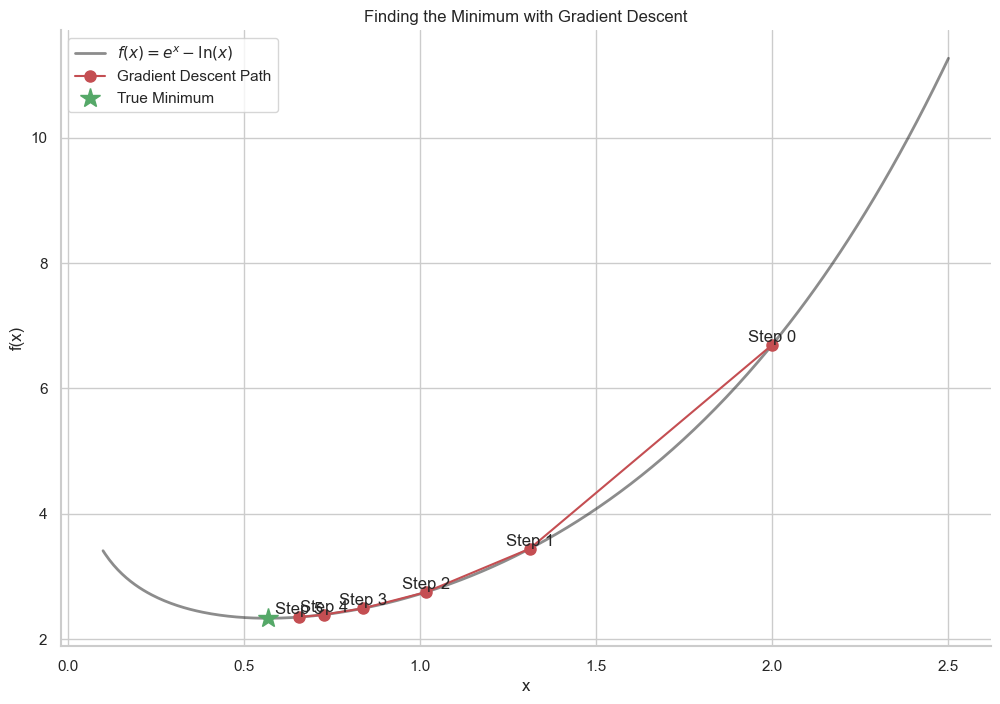

In [1]:
# --- A Note on the Code in This Section ---
# The Python code in these notebooks serves one purpose: to generate the visualizations
# that illustrate the mathematical concepts. You do not need to understand the code
# itself to learn the theory.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the theme for the plots
sns.set_theme(style="whitegrid")

# --- Define the function and its derivative ---
def f(x):
    return np.exp(x) - np.log(x)

def f_prime(x):
    return np.exp(x) - (1/x)

# --- Gradient Descent Parameters ---
learning_rate = 0.1
start_x = 2.0
num_iterations = 5

# --- Store the path of the descent ---
path_x = [start_x]
path_y = [f(start_x)]

# --- Perform the iterations ---
current_x = start_x
for i in range(num_iterations):
    gradient = f_prime(current_x)
    current_x = current_x - learning_rate * gradient
    path_x.append(current_x)
    path_y.append(f(current_x))

# --- Create the plot ---
fig, ax = plt.subplots(figsize=(12, 8))
x_vals = np.linspace(0.1, 2.5, 400)
y_vals = f(x_vals)

# Plot the function
ax.plot(x_vals, y_vals, 'k-', linewidth=2, alpha=0.5, label='$f(x) = e^x - \\ln(x)$')

# Plot the path of the gradient descent
ax.plot(path_x, path_y, 'ro-', markersize=8, label='Gradient Descent Path')
for i, (x_pos, y_pos) in enumerate(zip(path_x, path_y)):
    ax.text(x_pos, y_pos + 0.05, f'Step {i}', ha='center')

# Highlight the true minimum
ax.plot(0.567, f(0.567), 'g*', markersize=15, label='True Minimum')
    
# --- Format the plot ---
ax.set_title('Finding the Minimum with Gradient Descent')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()
ax.grid(True)

ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

## The Gradient Descent Algorithm in Summary

**Goal:** Find the minimum of a function `f(x)`.

1.  **Define a learning rate (`α`)** and choose a random **starting point (`x₀`)**.  

2.  **Calculate the derivative** `f'(x)` at your current point.  

3.  **Update your position** using the formula: $x_{new} = x_{old} - \alpha \cdot f'(x_{old})$.  

4.  **Repeat** step 2 and 3 for a fixed number of iterations, or until your position stops changing significantly.

The most powerful advantage of this method is that we **never had to solve the equation $f'(x)=0$**. We only need to be able to *calculate* the value of the derivative at any given point. This makes it possible to optimize incredibly complex functions where finding an analytical solution would be impossible.